In [32]:
import pandas as pd 
import numpy as np

df = pd.read_csv('contohTwit.csv')

adr = df['profileImageUrl'][200][:-11] + ".jpg"

adr

'http://pbs.twimg.com/profile_images/1034446672116338688/v1bsxUio.jpg'

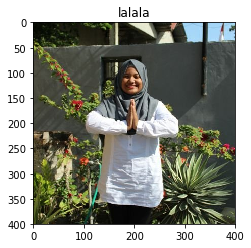

In [33]:
import cv2
import urllib
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def showImage(img, im_name) :
    fig = plt.figure()
    ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax1.set_title(im_name)
    plt.imshow(img)


arr = None
with urllib.request.urlopen(adr) as url:
#     s = url.read()
    arr = np.asarray(bytearray(url.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

showImage(img, 'lalala')

## Age Prediction

source : https://towardsdatascience.com/predict-age-and-gender-using-convolutional-neural-network-and-opencv-fd90390e3ce6

In [34]:
import cv2
import numpy as np

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']

def load_caffe_models():
    age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
    return(age_net)

def detect_age(img, age_net):
    font = cv2.FONT_HERSHEY_SIMPLEX
    image = img
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    if(len(faces)>0):
        print("Found {} faces".format(str(len(faces))))
        for (x, y, w, h )in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
            #Get Face 
            face_img = image[y:y+h, h:h+w].copy()
            blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
            #Predict Age
            age_net.setInput(blob)
            age_preds = age_net.forward()
            age = age_list[age_preds[0].argmax()]
            overlay_text = "%s" % (age)
            cv2.putText(image, overlay_text, (x, y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
            return age, image
    return age_list[0], image   

Found 1 faces
(8, 12)


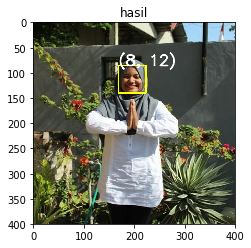

In [35]:
age_net = load_caffe_models()
age, res = detect_age(img, age_net)
print(age)

showImage(res, 'hasil')